In [9]:
PacletDataRebuild[] 

In [10]:
<< SetReplace`

In [11]:
<< SetReplace` (*these 3 instructions allow you to run the paclet WITHOUT ANY PROBLEM !!!*)

# Basics

-Graphics-
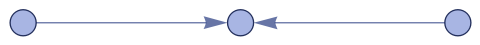

In [12]:
WolframModelPlot[SetReplaceAll[{{1, 2}, {3,2}},
  {{v1_, v2_, v3_}} :>
   Module[{v4, v5}, {{v2, v5}, {v5, v1},{v4, v3}}],3]] 
   (*SetReplaceAll performs the replacement process while WolframModelPlot gives the visualization*)

{-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, 
 
>   -Graphics-}
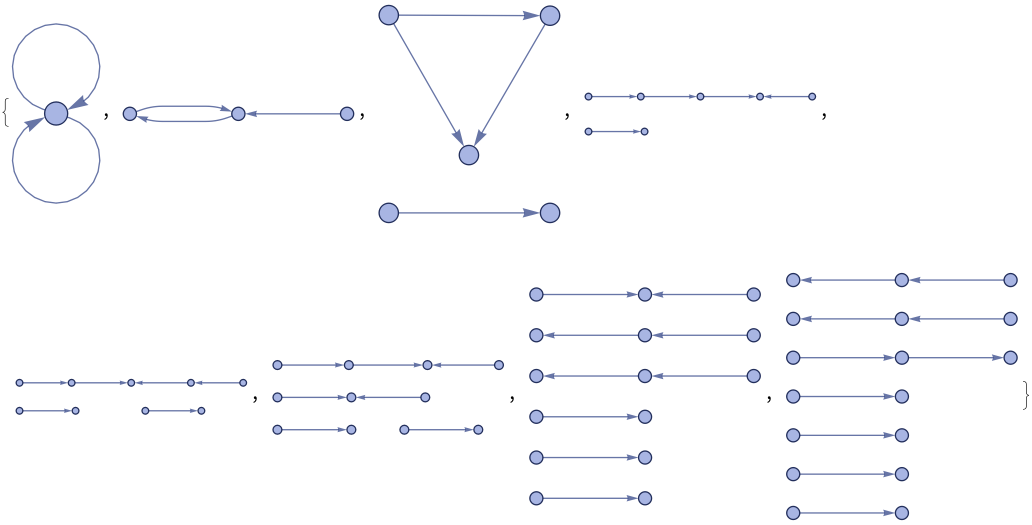

In [14]:
WolframModel[{{x, y}, {z, y}} -> {{y, u}, {u, x}, {v, z}}, {{x,x},{x,x}}, 20, "StatesPlotsList"]
(*Here are a simple examples of WolframModel function*)

-Graphics-
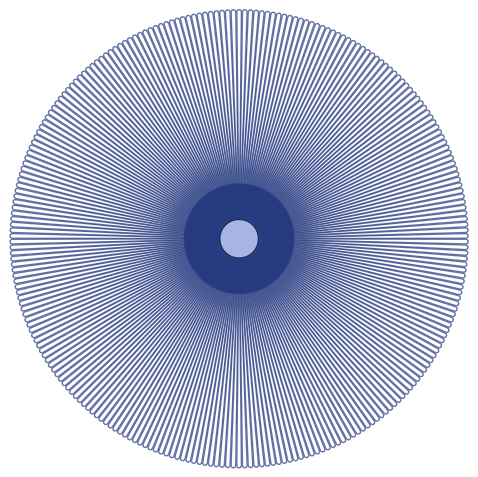

In [16]:
WolframModel[{{x}} -> {{x, x}, {x}}, {{x}}, 250, "FinalStatePlot"]

{-Graphics-, -Graphics-}
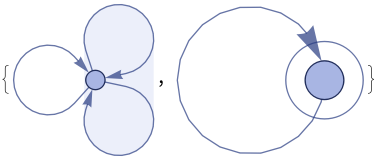

In [17]:
WolframModel[{{x, y, z}, {y, z}} -> {{x}, {x, y}}, {{x,x,x},{x,x}}, 10, "StatesPlotsList"]

In [18]:
$WolframModelProperties (*properties of WolframModel function*)

{AllEventsCount, AllEventsDistinctElementsCount, AllEventsEdgesCount, 
 
>   AllEventsEdgesList, AllEventsGenerationsList, AllEventsList, AllEventsRuleIndices, 
 
>   AllEventsStatesEdgeIndicesList, AllEventsStatesList, AllExpressions, 
 
>   AtomsCountFinal, AtomsCountTotal, CausalGraph, CompleteGenerationsCount, 
 
>   CreatorEvents, DestroyerEvents, EdgeCountList, EdgeCreatorEventIndices, 
 
>   EdgeDestroyerEventIndices, EdgeDestroyerEventsIndices, EdgeGenerationsList, 
 
>   EventGenerations, EventGenerationsList, EventsCount, EventsList, EventsStatesList, 
 
>   EventsStatesPlotsList, EvolutionObject, ExpressionGenerations, 
 
>   ExpressionsCountFinal, ExpressionsCountTotal, ExpressionsEventsGraph, 
 
>   FeatureAssociation, FeatureVector, FinalDistinctElementsCount, FinalEdgeCount, 
 
>   FinalState, FinalStatePlot, GenerationComplete, GenerationEventsCountList, 
 
>   GenerationEventsList, GenerationsCount, LayeredCausalGraph, MaxCompleteGeneration, 
 
>   MultiwayQ, PartialGenerationsCount, StatesList, StatesPlotsList, TerminationReason, 
 
>   TotalGenerationsCount, UpdatedStatesList, Version, VertexCountList}

In [19]:
$WolframModelRuleProperties

{ConnectedInput, ConnectedInputOutputUnion, ConnectedOutput, MaximumArity, NodeCounts, 
 
>   NodesDroppedAdded, Signature, TraditionalSignature, TransformationCount}

{-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-}
example.jpg
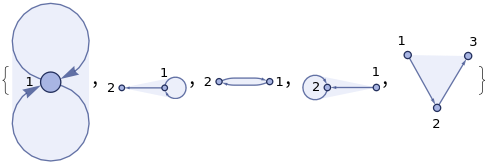

In [20]:
HypergraphPlot[#, ImageSize -> 60, VertexLabels -> Automatic] & /@ 
{{{1, 1, 1}},{{1, 1, 2}}, {{1, 2, 1}},{{1, 2, 2}}, {{1, 2, 3}}}
Export["example.jpg", %] (*the image can be saved, among others, as png, jpg, svg*)

-Graphics-
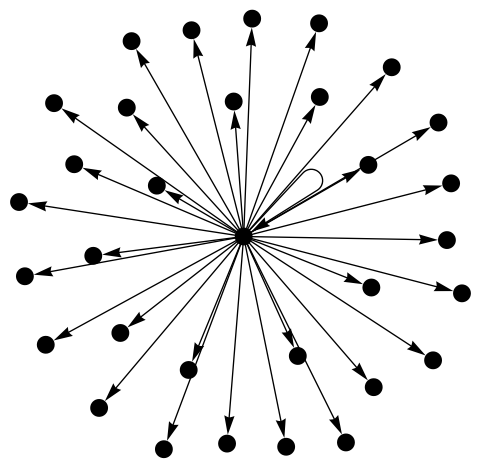

In [22]:
HypergraphPlot[WolframModel[{{1, 2}} ->
   {{1, 2}, {1, 3}},
  {{1, 1}}, 5, "FinalState"], VertexStyle -> Black, EdgeStyle -> Black] (*some cosmetics*)

# {{1,2,3}}->{{1,2,4},{2,4,3}} rule analysis

{-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, 
 
>   -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, 
 
>   -Graphics-, -Graphics-}
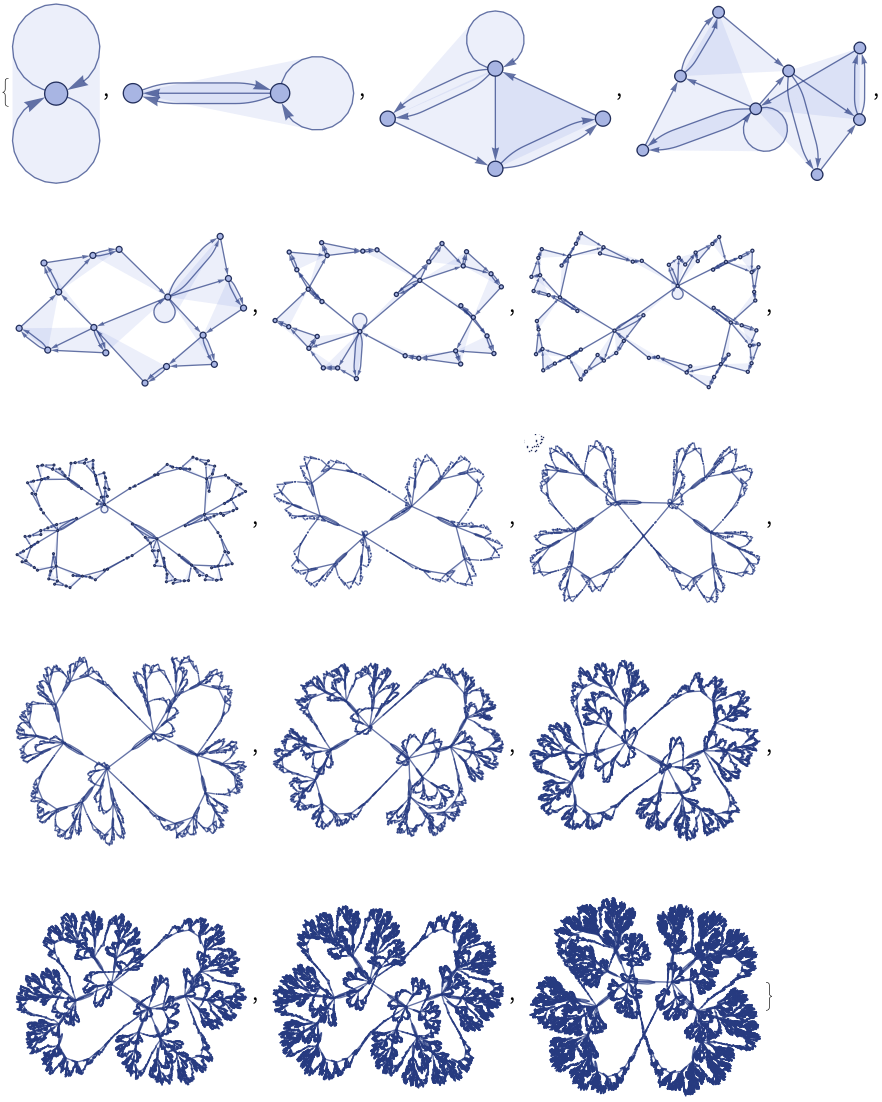

In [23]:
WolframModel[{{{1,2,3}}->{{1,2,4},{2,4,3}}},{{1,1,1}},15,"StatesPlotsList"] 
(*visualization of 15 generations of rule*)

{-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, 
 
>   -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, 
 
>   -Graphics-, -Graphics-}
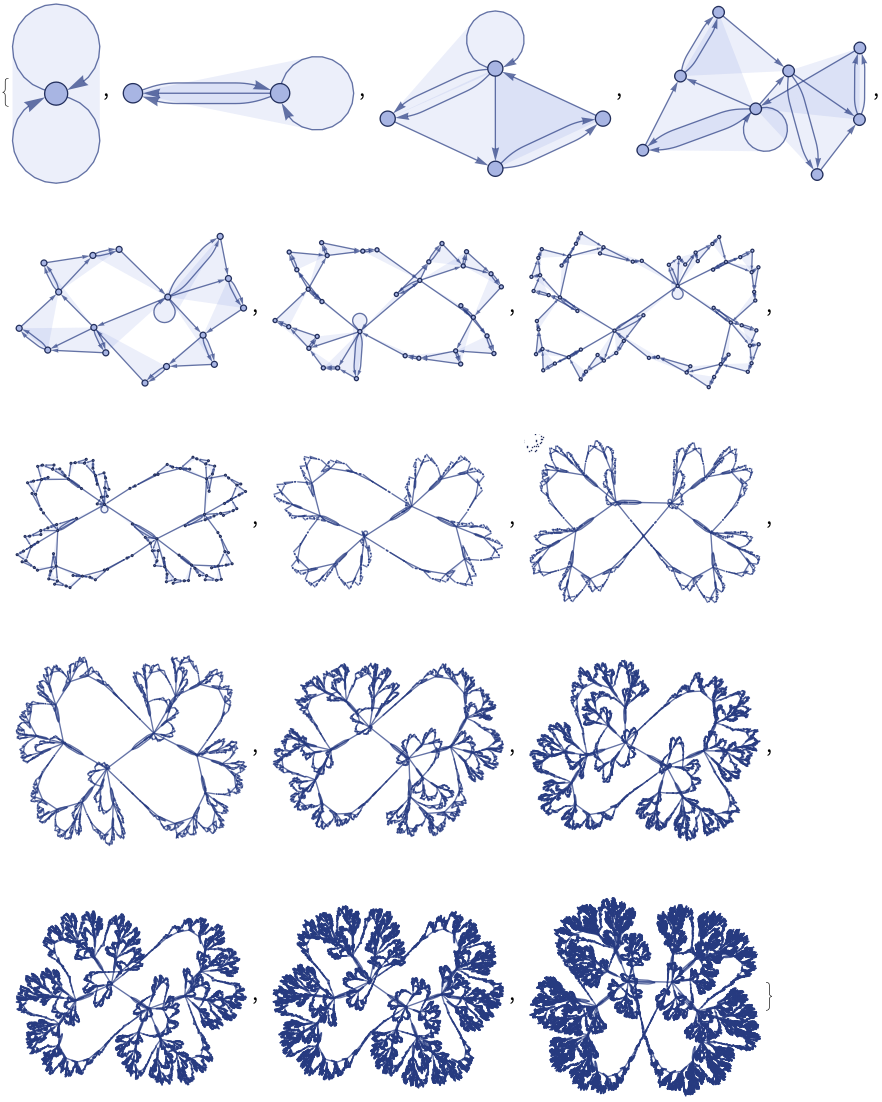

In [25]:
WolframModelPlot /@ (WolframModel[{{{1,2,3}}->{{1,2,4},{2,4,3}}},{{1,1,1}}, 15]
["Generation", #] &) /@ Range[0, 15] (*another way*)

{-Graphics-, -Graphics-, -Graphics-, -Graphics-}
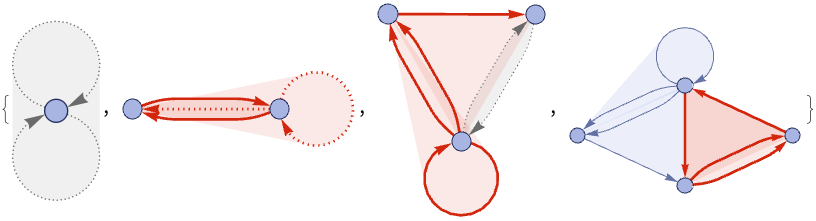

In [26]:
WolframModel[{{{1,2,3}}->{{1,2,4},{2,4,3}}},{{1,1,1}},2,"EventsStatesPlotsList"] (*states in 2 generations*)

3837
Global Clustering Coefficient: -----
                               11192
Graph Diameter : 13
                                    314887
Average distance between vertices : ------
                                    43648
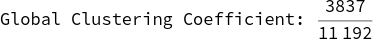
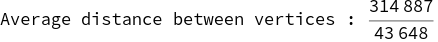

In [27]:
evolution = WolframModel[{{{1,2,3}}->{{1,2,4},{2,4,3}}},{{1,1,1}},10,"FinalState"];

(*first you need to convert WolframModel to a function graph*)
graph = HypergraphToGraph[evolution, "UndirectedDistancePreserving"]; 

(*for directed graph properties use "DirectedDistancePreserving"*)
 
Row[{"Global Clustering Coefficient: ", GlobalClusteringCoefficient[graph]}]
Row[{"Graph Diameter : ", GraphDiameter[graph]}]
Row[{"Average distance between vertices : ", MeanGraphDistance[graph]}]

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0128333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2]]}, {Vertices, Edges}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {False, False}, LabelStyle -> {}, LegendLayout -> Column], After, 
 
>    Identity]]
Number of vertices: {1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 
 
>    16384, 32768}
Number of edges: {1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 
 
>    32768}
                                     -1 + t
Formula for the number of vertices :2
                                  -1 + t
Formula for the number of edges :2
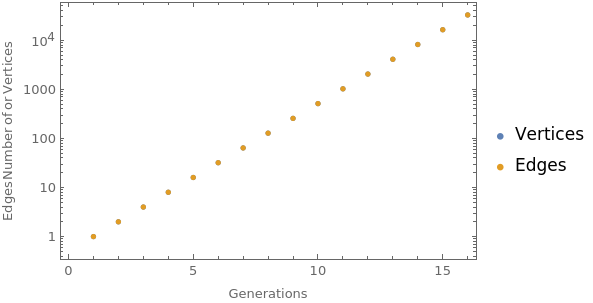

In [35]:
{vertexCountList,edgeCountList}= 
WolframModel[{{{1,2,3}}->{{1,2,4},{2,4,3}}},{{1,1,1}},15,{"VertexCountList","EdgeCountList"}];
ListLogPlot[{vertexCountList,edgeCountList}, Joined -> False, PlotLegends -> {"Vertices", "Edges"}, 
Frame -> True, FrameLabel -> {Generations, Number of Vertices or Edges}]
Row[{"Number of vertices: ", vertexCountList}]
Row[{"Number of edges: ", edgeCountList}]
Row[{"Formula for the number of vertices :", FindSequenceFunction[vertexCountList,t]}]
Row[{"Formula for the number of edges :", FindSequenceFunction[edgeCountList,t]}]
(*this way you can check the number of edges and vertices and determine their pattern during subsequent 
generations*)


Graph[<127>, <126>]
Graph[<127>, <126>]
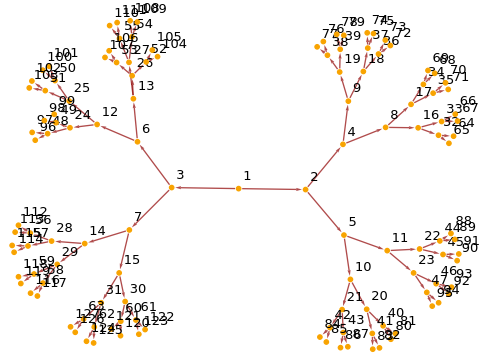
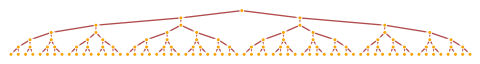

In [42]:
WolframModel[{{{1,2,3}}->{{1,2,4},{2,4,3}}},{{1,1,1}},7]["CausalGraph", VertexLabels -> Automatic]
(*causal graphs examples*)

WolframModel[{{{1,2,3}}->{{1,2,4},{2,4,3}}},{{1,1,1}},7,"LayeredCausalGraph"]

-Graphics-
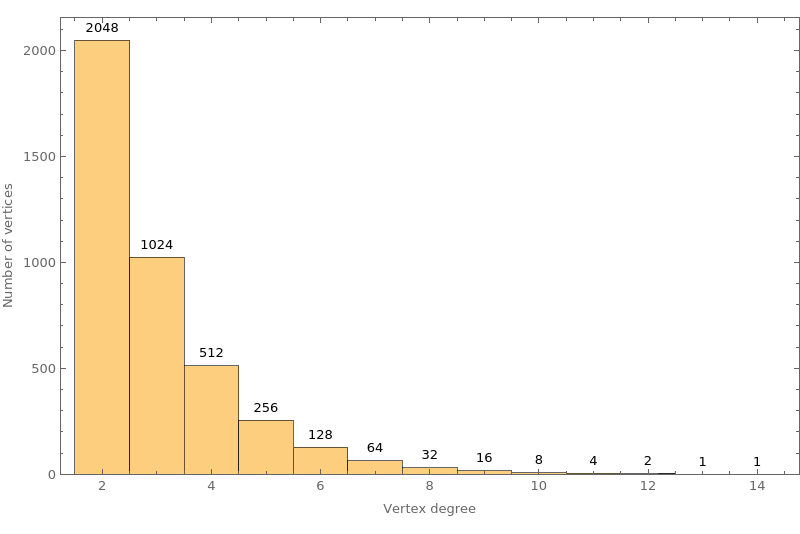

In [45]:
Histogram[Values[Counts[Catenate[Union /@ 
WolframModel[{{{1,2,3}}->{{1,2,4},{2,4,3}}},{{1,1,1}},12,"FinalState"]]]],12, LabelingFunction -> Above, 
Frame-> True, FrameLabel -> {"Vertex degree", "Number of vertices"}, ImageSize -> {600,400}]
(*vertex degree histogram*)

-Graphics-
-Graphics-
-Graphics-
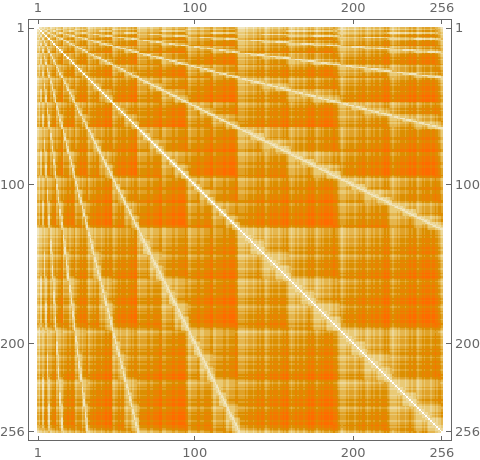
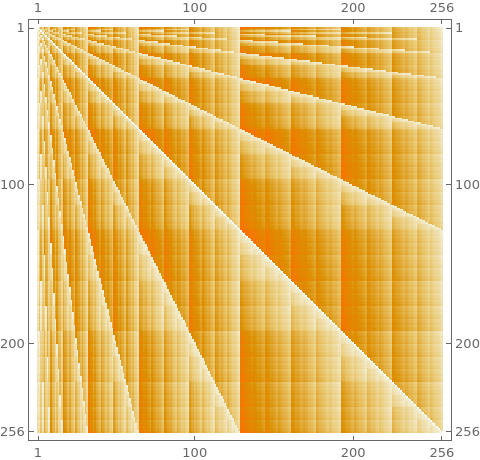
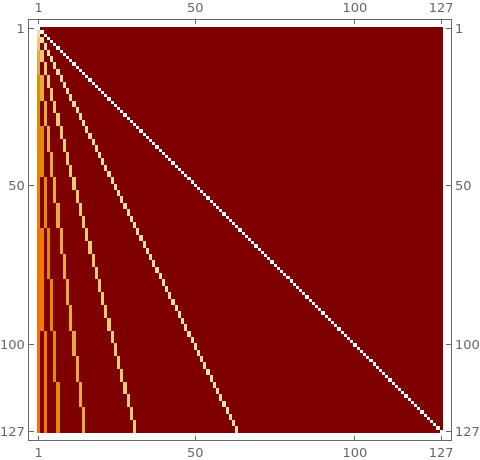

In [47]:
evolution = WolframModel[{{{1,2,3}}->{{1,2,4},{2,4,3}}},{{1,1,1}},8,"FinalState"];
graph = HypergraphToGraph[evolution, "UndirectedDistancePreserving"];
MatrixPlot[Transpose[GraphDistanceMatrix[graph]]] (*Graph Distance Matrices*)

evolution = WolframModel[{{{1,2,3}}->{{1,2,4},{2,4,3}}},{{1,1,1}},8,"FinalState"];
graph = HypergraphToGraph[evolution, "DirectedDistancePreserving"];
MatrixPlot[Transpose[GraphDistanceMatrix[graph]]]

MatrixPlot[Transpose[GraphDistanceMatrix[WolframModel[{{{1,2,3}}->{{1,2,4},{2,4,3}}},
{{1,1,1}},7]["CausalGraph"]]]] (*for Causal Graph*)

# {{1,2,3},{2,4,5}}->{{6,1,7},{6,5,8},{7,5,3},{2,4,6}} rule analysis

{-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, 
 
>   -Graphics-}
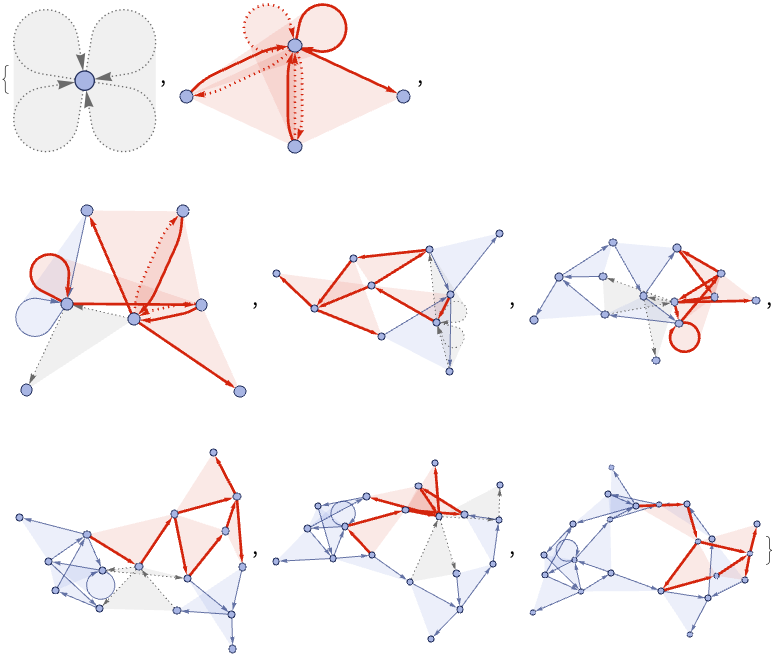

In [54]:
WolframModel[{{{1,2,3},{2,4,5}}->{{6,1,7},{6,5,8},{7,5,3},{2,4,6}}},{{1,1,1},{1,1,1}}, 
<|"MaxEvents" -> 7|>, "EventsStatesPlotsList"] (*example of states with condition*)

-Graphics-
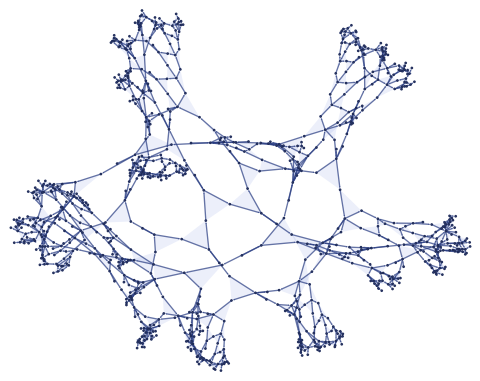

In [55]:
WolframModel[{{{1,2,3},{2,4,5}}->{{6,1,7},{6,5,8},{7,5,3},{2,4,6}}},{{1,1,1},{1,1,1}}, 20,
"FinalStatePlot"]

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0128333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2]]}, {Vertices, Edges}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {False, False}, LabelStyle -> {}, LegendLayout -> Column], After, 
 
>    Identity]]
Number of vertices :{1, 4, 7, 13, 19, 28, 40, 55, 76, 91, 115, 139, 172, 220, 274, 343}
Number of edges:{2, 4, 6, 10, 14, 20, 28, 38, 52, 62, 78, 94, 116, 148, 184, 230}
Formula for the number of vertices :
 
>   FindSequenceFunction[{1, 4, 7, 13, 19, 28, 40, 55, 76, 91, 115, 139, 172, 220, 274, 
 
>     343}, t]
Formula for the number of edges:FindSequenceFunction[{2, 4, 6, 10, 14, 20, 28, 38, 52, 
 
>     62, 78, 94, 116, 148, 184, 230}, t]
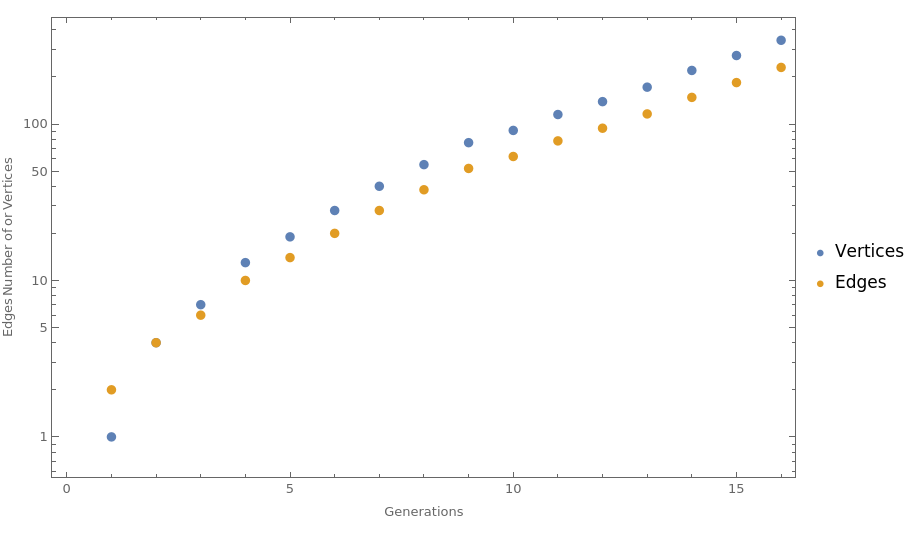
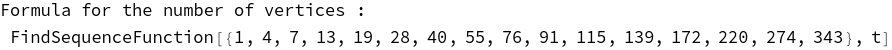
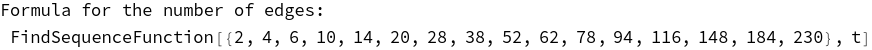

In [56]:
{vertexCountList,edgeCountList}= 
WolframModel[{{{1,2,3},{2,4,5}}->{{6,1,7},{6,5,8},{7,5,3},{2,4,6}}},{{1,1,1},{1,1,1}}, 15,
 {"VertexCountList","EdgeCountList"}];
ListLogPlot[{vertexCountList,edgeCountList}, Joined -> False, PlotLegends -> {"Vertices", "Edges"}, 
Frame -> True, FrameLabel -> {Generations, Number of Vertices or Edges}, ImageSize -> {600, 400}]
Row[{"Number of vertices :", vertexCountList}]
Row[{"Number of edges:", edgeCountList}] 
Row[{"Formula for the number of vertices :", FindSequenceFunction[vertexCountList, t]}]
Row[{"Formula for the number of edges:", FindSequenceFunction[edgeCountList, t]}]

-Graphics-
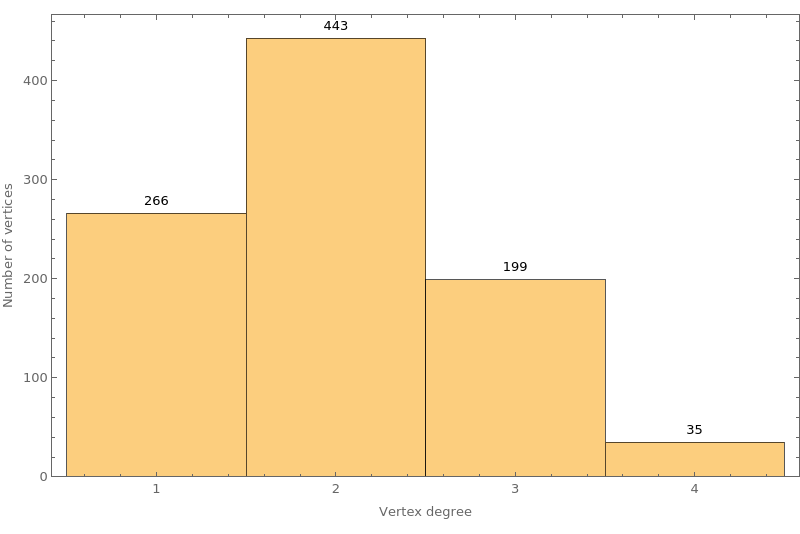

In [62]:
Histogram[Values[Counts[Catenate[Union /@ 
WolframModel[{{{1,2,3},{2,4,5}}->{{6,1,7},{6,5,8},{7,5,3},{2,4,6}}},{{1,1,1},{1,1,1}}, 
20,"FinalState"]]]],12, LabelingFunction -> Above, Frame-> True, FrameLabel -> 
{"Vertex degree", "Number of vertices"}, ImageSize -> {600,400}]

-Graphics-
-Graphics-
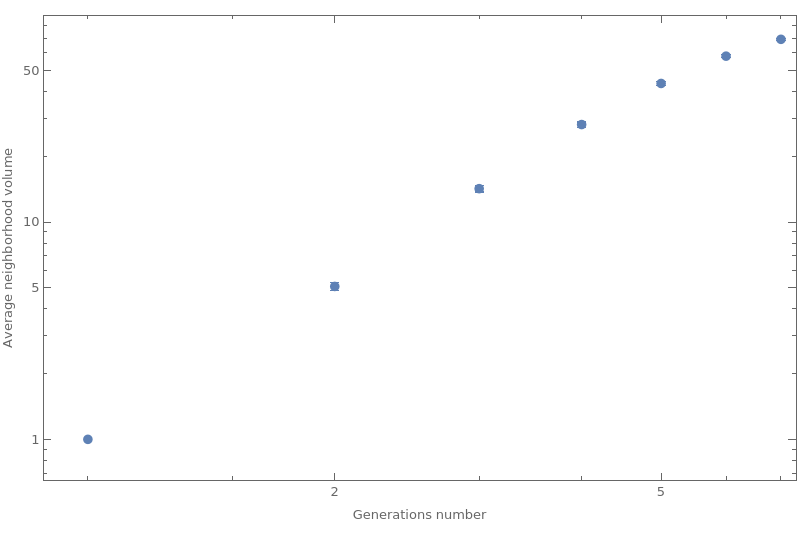
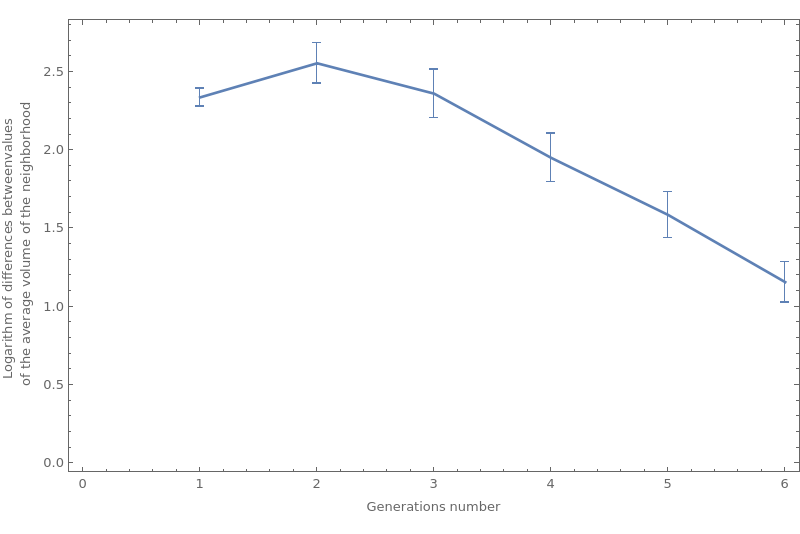

In [63]:
model = WolframModel[{{{1,2,3},{2,4,5}}->{{6,1,7},{6,5,8},{7,5,3},{2,4,6}}},{{1,1,1},{1,1,1}},8,"FinalState"];
values = Values[ResourceFunction["HypergraphNeighborhoodVolumes"][model, All, Automatic]];
volumes = ResourceFunction["RaggedMeanAround"][values];

ListLogLogPlot[volumes, Frame -> True, FrameLabel -> {"Generations number", "Average neighborhood volume"},
ImageSize -> {600,400}]

ListLinePlot[ResourceFunction["LogDifferences"][volumes], Frame -> True,
FrameLabel -> {"Generations number", "Logarithm of differences between
values \n of the average volume of the neighborhood"}, ImageSize -> {600,400}] 
(*Average neighborhood volume log plots*)

276
GlobalClusteringCoefficient : ---
                              883
Graph diameter : 10
                                    32888
Average distance between vertices : -----
                                    6555
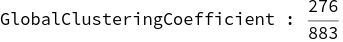
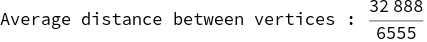

In [69]:
evolution = WolframModel[{{{1,2,3},{2,4,5}}->{{6,1,7},{6,5,8},{7,5,3},{2,4,6}}},{{1,1,1},{1,1,1}},10,"FinalState"];
graph = HypergraphToGraph[evolution, "UndirectedDistancePreserving"];
  
Row[{"GlobalClusteringCoefficient : ", GlobalClusteringCoefficient[graph]}]
Row[{"Graph diameter : ", GraphDiameter[graph]}]
Row[{"Average distance between vertices : ", MeanGraphDistance[graph]}]

-Graphics-
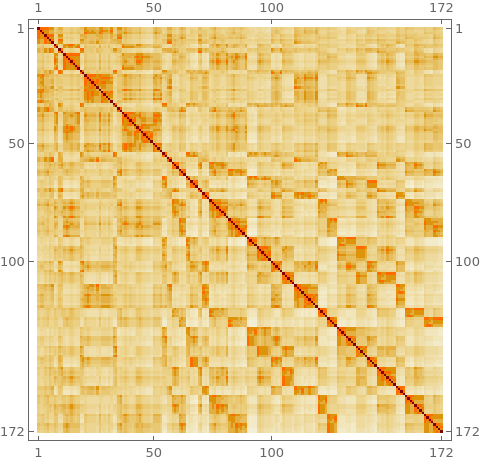

In [75]:
model = WolframModel[{{{1,2,3},{2,4,5}}->{{6,1,7},{6,5,8},{7,5,3},{2,4,6}}},{{1,1,1},{1,1,1}},12,"FinalState"];
distanceMatrix=GraphDistanceMatrix[UndirectedGraph[ResourceFunction["HypergraphToGraph"][model]]];
MatrixPlot[Exp[-(distanceMatrix/. 0->None)]] (*Distance Matrix for Undirected Graph*)

-Graphics-
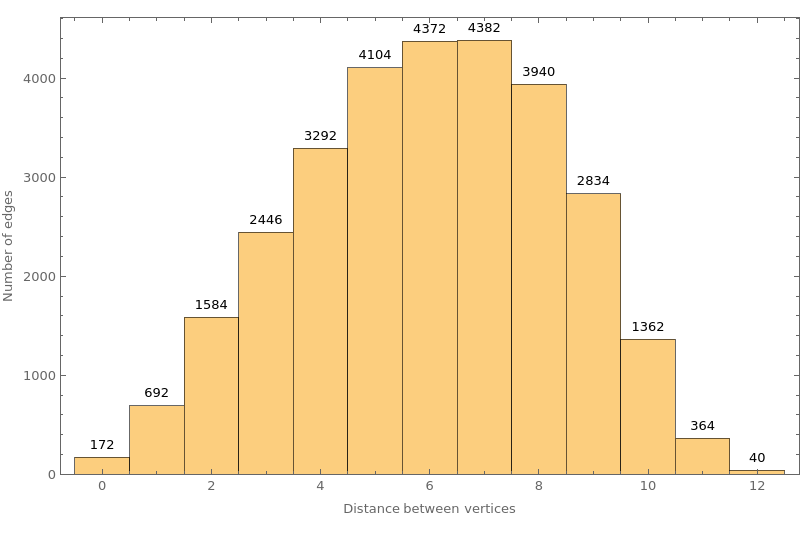

In [78]:
model = WolframModel[{{{1,2,3},{2,4,5}}->
{{6,1,7},{6,5,8},{7,5,3},{2,4,6}}},{{1,1,1},{1,1,1}},12,"FinalState"];
distanceMatrix=GraphDistanceMatrix[UndirectedGraph[ResourceFunction["HypergraphToGraph"][model]]];
Histogram[Flatten[distanceMatrix], LabelingFunction -> Above, Frame -> True, FrameLabel -> 
{"Distance between vertices","Number of edges"}, 
ImageSize -> {600,400}]

# {{1,2,3},{4,5,6}}->{{1,5,7},{1,7,4},{2,5,4},{8,7,5}}} rule analysis

{-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, 
 
>   -Graphics-, -Graphics-}
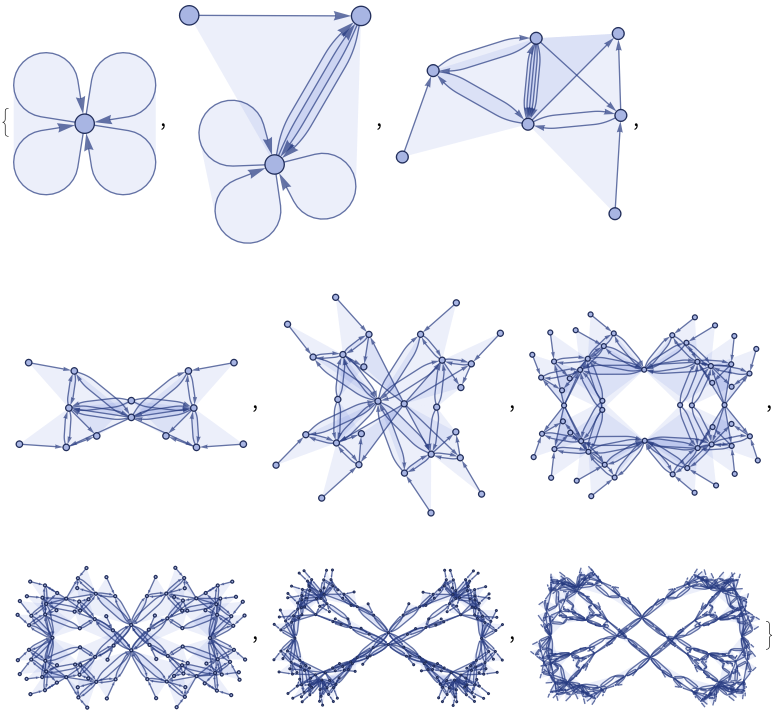

In [81]:
WolframModel[{{{1,2,3},{4,5,6}}->{{1,5,7},{1,7,4},{2,5,4},{8,7,5}}},{{1,1,1},{1,1,1}}, 8, "StatesPlotsList"]

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0128333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2]]}, {Vertices, Edges}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {False, False}, LabelStyle -> {}, LegendLayout -> Column], After, 
 
>    Identity]]
Number of vertices :{1, 3, 7, 14, 28, 56, 112, 224, 448, 896, 1792}
Number of edges :{2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048}
Formula for the number of vertices :
 
>   DifferenceRoot[{-2 #1[#2] + #1[1 + #2] == 0, #1[1] == 1, #1[2] == 3, #1[3] == 7} & ][
 
>    t]
                                  t
Formula for the number of edges :2
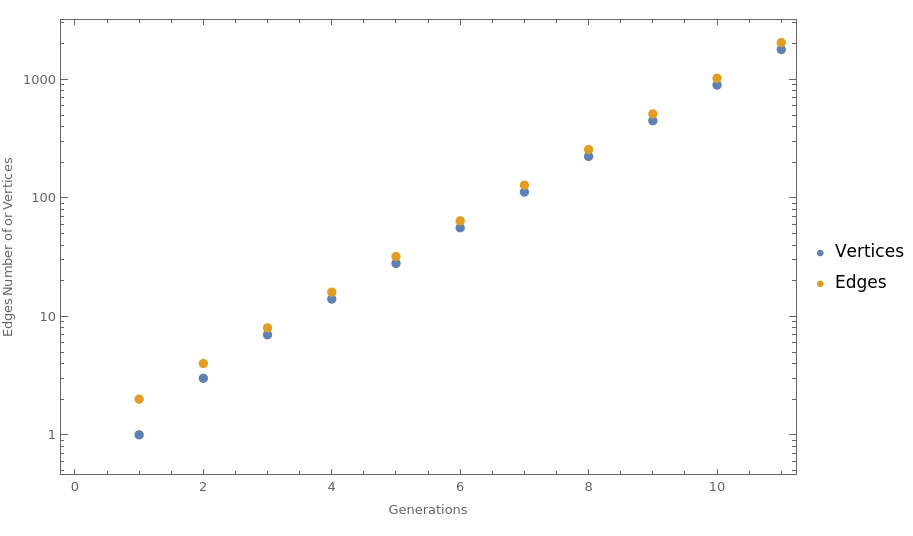
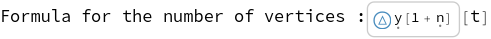

In [82]:
{vertexCountList,edgeCountList}= 
WolframModel[{{{1,2,3},{4,5,6}}->{{1,5,7},{1,7,4},{2,5,4},{8,7,5}}},{{1,1,1},{1,1,1}}, 10, 
{"VertexCountList","EdgeCountList"}];
ListLogPlot[{vertexCountList,edgeCountList}, Joined -> False, PlotLegends -> {"Vertices", "Edges"}, 
Frame -> True, FrameLabel -> {Generations, Number of Vertices or Edges}, ImageSize -> {600, 400}]
Row[{"Number of vertices :", vertexCountList}]
Row[{"Number of edges :", edgeCountList}]
Row[{"Formula for the number of vertices :", FindSequenceFunction[vertexCountList,t]}]
Row[{"Formula for the number of edges :", FindSequenceFunction[edgeCountList,t]}]

6
Global Clustering Coefficient : --
                                19
Graph diameter: 21
                                    260945
Average distance between vertices : ------
                                    22288
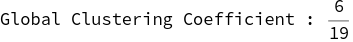
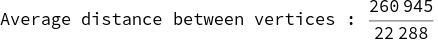

In [88]:
evolution = WolframModel[{{{1,2,3},{4,5,6}}->{{1,5,7},{1,7,4},{2,5,4},{8,7,5}}},{{1,1,1},{1,1,1}}, 10,"FinalState"];
graph = HypergraphToGraph[evolution, "UndirectedDistancePreserving"];
  
Row[{"Global Clustering Coefficient : ", GlobalClusteringCoefficient[graph]}]
Row[{"Graph diameter: ", GraphDiameter[graph]}]
Row[{"Average distance between vertices : ", MeanGraphDistance[graph]}]

-Graphics-
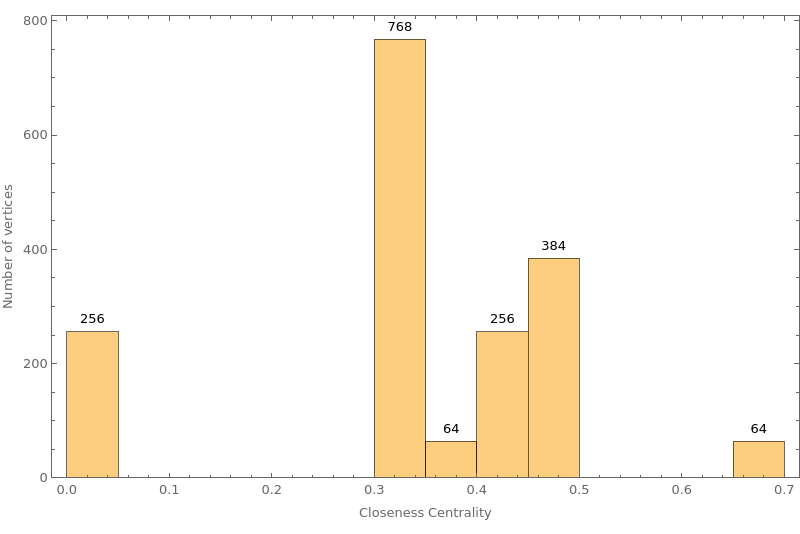

In [94]:
model = WolframModel[{{{1,2,3},{4,5,6}}->{{1,5,7},{1,7,4},{2,5,4},{8,7,5}}},{{1,1,1},{1,1,1}}, 10, "FinalState"];
graph = ResourceFunction["HypergraphToGraph"][model];
Histogram[ClosenessCentrality[graph], LabelingFunction -> Above, Frame -> True, ImageSize -> {600,400},
FrameLabel -> {"Closeness Centrality", "Number of vertices"}]

-Graphics-
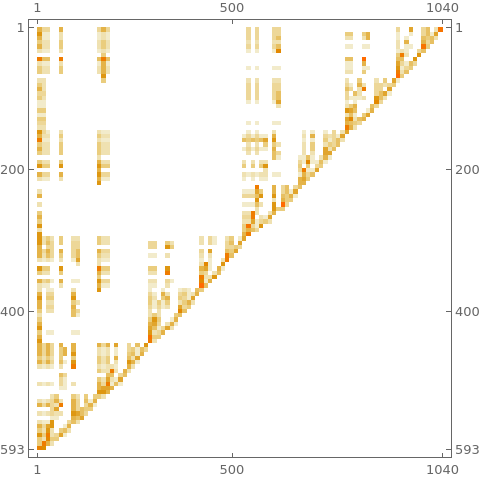

In [97]:
model = WolframModel[{{{1,2,3},{4,5,6}}->{{1,5,7},{1,7,4},{2,5,4},{8,7,5}}},{{1,1,1},{1,1,1}}, 8, "FinalState"];
graph = ResourceFunction["HypergraphToGraph"][model];
EdgeCycleMatrix[UndirectedGraph[graph]]//MatrixPlot (*here are some properties related to cycles*)

-Graphics-
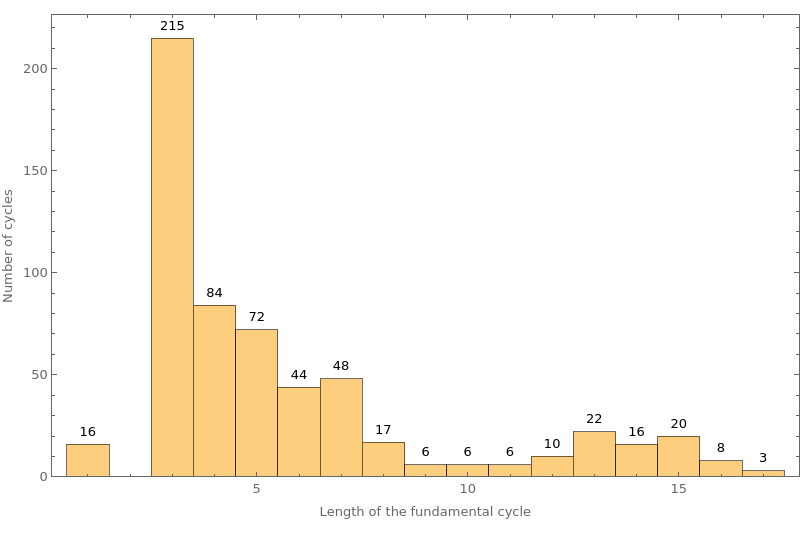

In [100]:
model = WolframModel[{{{1,2,3},{4,5,6}}->{{1,5,7},{1,7,4},{2,5,4},{8,7,5}}},{{1,1,1},{1,1,1}}, 8, "FinalState"];
graph = ResourceFunction["HypergraphToGraph"][model];
Histogram[Length/@FindFundamentalCycles[UndirectedGraph[graph]], LabelingFunction -> Above, Frame -> True, 
ImageSize -> {600,400}, FrameLabel -> {"Length of the fundamental cycle", "Number of cycles"}]


Graph[<448>, <447>]
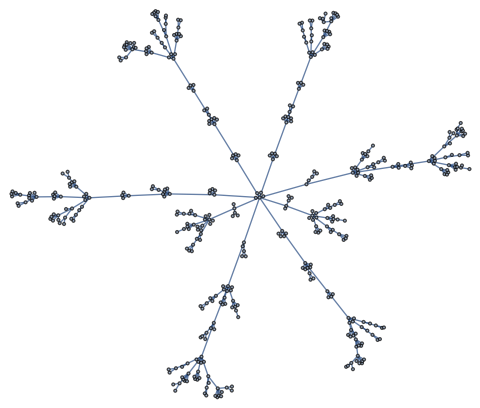

In [103]:
model = WolframModel[{{{1,2,3},{4,5,6}}->{{1,5,7},{1,7,4},{2,5,4},{8,7,5}}},{{1,1,1},{1,1,1}}, 8, "FinalState"];
graph = ResourceFunction["HypergraphToGraph"][model];
FindSpanningTree[UndirectedGraph[graph]]